In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from nn_interpretability.interpretation.lrp.lrp_0 import LRP0
from nn_interpretability.interpretation.lrp.lrp_eps import LRPEpsilon
from nn_interpretability.interpretation.lrp.lrp_gamma import LRPGamma
from nn_interpretability.interpretation.lrp.lrp_ab import LRPAlphaBeta
from nn_interpretability.interpretation.lrp.lrp_composite import LRPMix
from nn_interpretability.model.model_trainer import ModelTrainer
from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.mnist_visualizer import MnistVisualizer
from nn_interpretability.dataset.mnist_data_loader import MnistDataLoader

In [2]:
model_name = 'model_cnn.pt'

train = False

In [3]:
mnist_data_loader = MnistDataLoader()

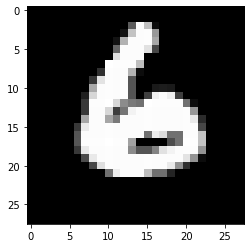

In [4]:
MnistVisualizer.show_dataset_examples(mnist_data_loader.trainloader)

In [5]:
model = ModelRepository.get_general_mnist_cnn(model_name)

if train:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    model.train()
    ModelTrainer.train(model, criterion, optimizer, mnist_data_loader.trainloader)
    
    ModelRepository.save(model, model_name)

# I. LRP-0

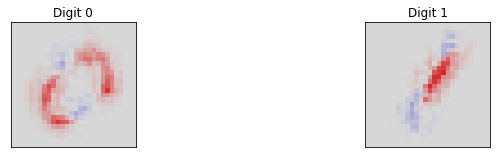

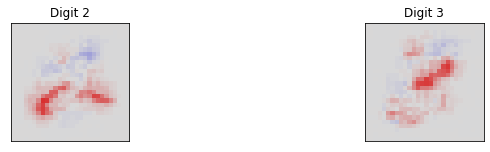

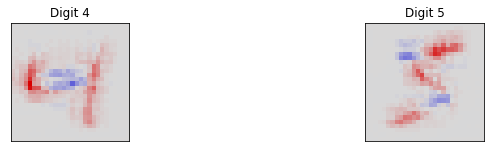

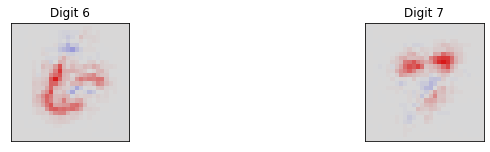

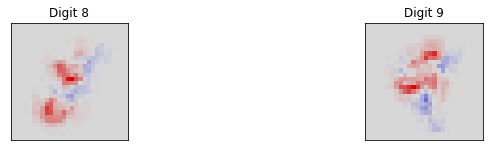

In [6]:
images = []

for i in range(10):
    
    img = mnist_data_loader.get_image_for_class(i)
    
    # LRP0(model, target_class, transforms, visualize_layer)    
    interpretor = LRP0(model, i, None, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))
    
MnistVisualizer.display_heatmap_for_each_class(images)

## Comparison between LRP gradient and LRP  convolution transpose implementation 
For **convolution layers** there is no difference, we will obtain the same numerical results with either approach. However, for **pooling layers** the result from convolution transpose approach is **4^(n)** as large as for those from gradient approach, where n is the number of pooling layers. The reason is because in every average unpooling operation, s will be unpooled directly without multiplying any scaling factor. For gradient approach, every input activation influence the output equally therefore the gradient for every activation entrices is 0.25. The operation is an analog of first unpooling and then multiplying a scale of 0.25 to s. 

The gradient approach will be more reasonable to the equation described in Montavon's paper. As we treat pooling layers like convolutional layers, the scaling factor 0.25 from pooling should be considered in the steps that we multiply weights in convolutional layers (step1 and step3).

# II. LRP-ε

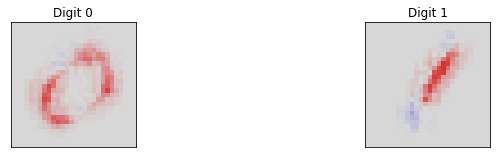

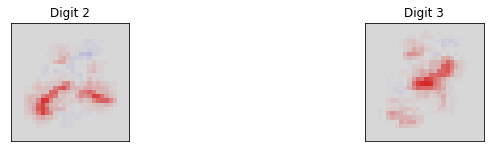

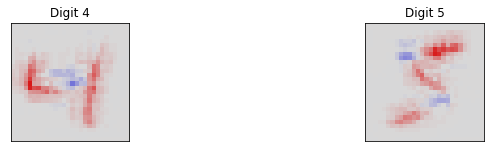

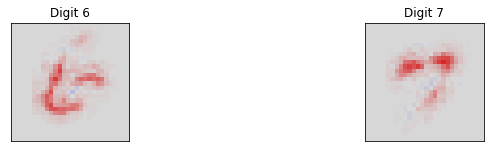

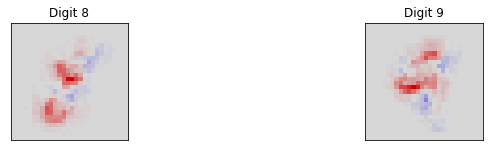

In [7]:
images = []

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    # LRPEpsilon(model, target_class, transforms, visualize_layer)    
    interpretor = LRPEpsilon(model, i, None, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))
    
MnistVisualizer.display_heatmap_for_each_class(images)

# III. LRP- γ

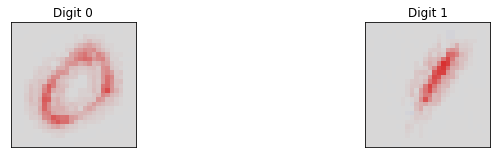

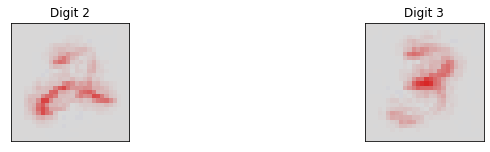

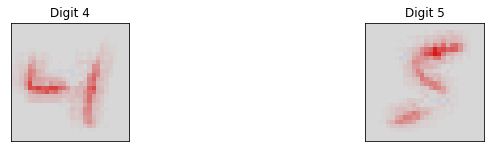

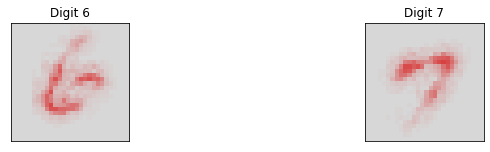

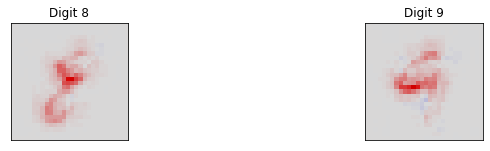

In [8]:
images = []

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)

    # LRPGamma(model, target_class, transforms, visualize_layer)    
    interpretor = LRPGamma(model, i, None, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))
    
MnistVisualizer.display_heatmap_for_each_class(images)

# IV. LRP-αβ

## 1. LPP-α1β0

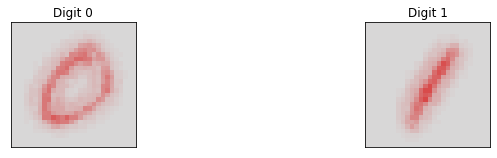

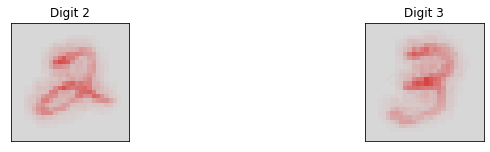

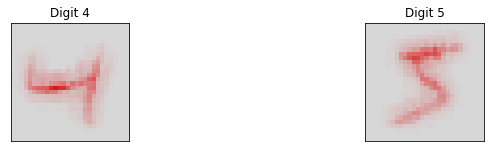

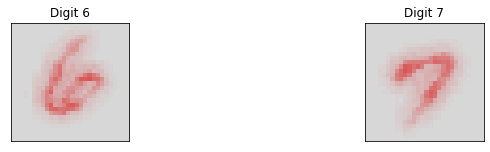

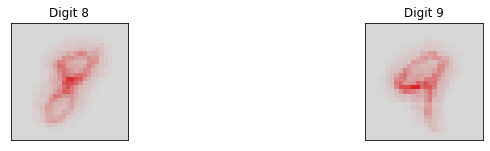

In [7]:
images = []

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    # LRPAlphaBeta(model, target_class, transforms, alpha, beta, visualize_layer)        
    interpretor = LRPAlphaBeta(model, i, None, 1, 0, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))
    
MnistVisualizer.display_heatmap_for_each_class(images)

## 2. LPP-α2β1

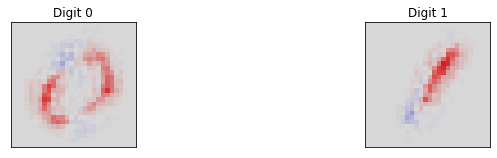

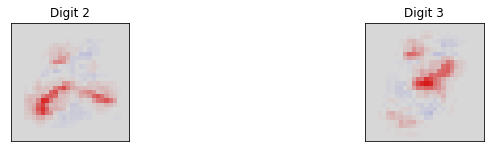

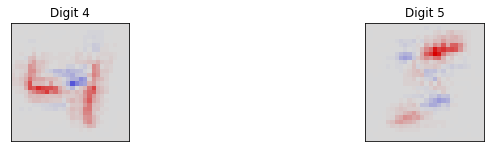

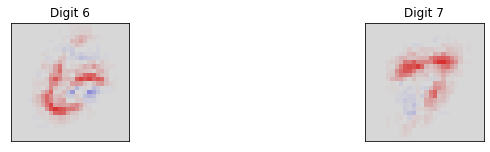

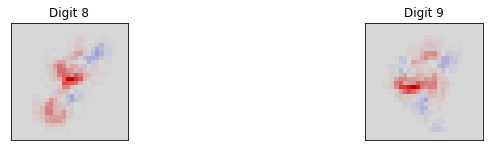

In [10]:
images = []
img_shape = (28, 28)

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    # LRPAlphaBeta(model, target_class, transforms, alpha, beta, visualize_layer)    
    interpretor = LRPAlphaBeta(model, i, None, 2, 1, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))
    
MnistVisualizer.display_heatmap_for_each_class(images)

# IV. Composite LRP

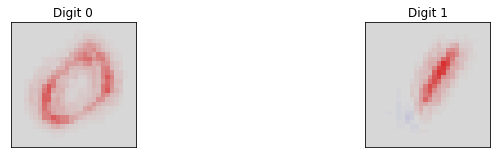

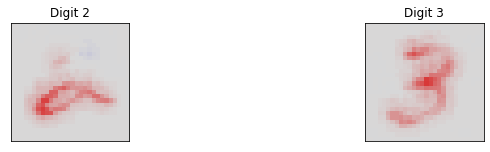

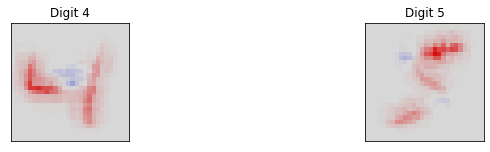

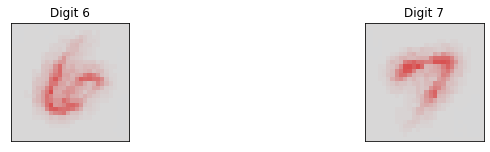

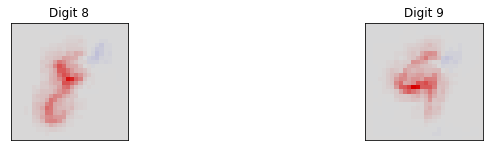

In [6]:
images = []
img_shape = (28, 28)

for i in range(10):
    img = mnist_data_loader.get_image_for_class(i)
    
    # LRPMix(model, target_class, transforms, alpha, beta, visualize_layer)
    interpretor = LRPMix(model, i, None, 1, 0, 0)
    endpoint = interpretor.interpret(img)

    images.append(endpoint[0].detach().cpu().numpy().sum(axis=0))

MnistVisualizer.display_heatmap_for_each_class(images)